# Analysis of Flights and Airports Data using Spark SQL
## Table of Contents

- [Data Import](#import)
- [Data Preparation](#data-preparation)
- [Data Analysis](#data-analysis)
- [Visualisation](#vis)
- [Training Model](#training-model)
- [Testing Model](#testing-model)
- [Using machine learning Algorithm for Prediction](#using-machine-learningalgorithm-for-prediction)

## Data Import <a class="anchor" id="import"></a>

In [1]:
#pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install pyspark

In [2]:
# import the dataframe sql data types
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [3]:
#
# flightSchema describes the structure of the data in the flights.csv file
#
flightSchema = StructType([
    StructField("id", IntegerType(), False),
    StructField("year", StringType(), False),
    StructField("month", StringType(), False),
    StructField("day", StringType(), False),
    StructField("dep_time", StringType(), False),
    StructField("sched_dep_time", StringType(), False),
    StructField("dep_delay", StringType(), False),
    StructField("arr_time", StringType(), False),
    StructField("sched_arr_delay", IntegerType(), False),
    StructField("arr_delay", StringType(), False),
    StructField("carrier", StringType(), False),
    StructField("flight", IntegerType(), False),
    StructField("tailnum", StringType(), False),
    StructField("origin", StringType(), False),
    StructField("dest", StringType(), False),
    StructField("air_time", StringType(), False),
    StructField("distance", StringType(), False),
    StructField("hour", IntegerType(), False),
    StructField("minute", IntegerType(), False),
    StructField("time_hour", TimestampType(), False),
    StructField("name", StringType(), False),    
])

In [4]:
#
# spark session to perform all tasks
#
spark = SparkSession.builder.appName('150265_KrishnaPrasadAdhikari_STW7082CEM').getOrCreate()

In [5]:
#
# Use the dataframe reader to read the file and 
#
flights = spark.read.csv("flights.csv", schema=flightSchema, header=True, multiLine=True)

In [6]:
flights.show()

+---+----+-----+---+--------+--------------+---------+--------+---------------+---------+-------+------+-------+------+----+--------+--------+----+------+-------------------+--------------------+
| id|year|month|day|dep_time|sched_dep_time|dep_delay|arr_time|sched_arr_delay|arr_delay|carrier|flight|tailnum|origin|dest|air_time|distance|hour|minute|          time_hour|                name|
+---+----+-----+---+--------+--------------+---------+--------+---------------+---------+-------+------+-------+------+----+--------+--------+----+------+-------------------+--------------------+
|  0|2013|    1|  1|   517.0|           515|      2.0|   830.0|            819|     11.0|     UA|  1545| N14228|   EWR| IAH|   227.0|    1400|   5|    15|2013-01-01 05:00:00|United Air Lines ...|
|  1|2013|    1|  1|   533.0|           529|      4.0|   850.0|            830|     20.0|     UA|  1714| N24211|   LGA| IAH|   227.0|    1416|   5|    29|2013-01-01 05:00:00|United Air Lines ...|
|  2|2013|    1|  1|

## Data Preparation <a class="anchor" id="data-preparation"></a>

In [7]:
#
# Repartitioned the data set to 8 partitions
#
flights = flights.repartition(8)
flights.rdd.getNumPartitions()

8

In [8]:
# Show the inferred schema for the airports dataframe
flights.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- sched_dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- sched_arr_delay: integer (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)
 |-- time_hour: timestamp (nullable = true)
 |-- name: string (nullable = true)



In [9]:
flights.describe().show()

+-------+-----------------+------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------+------------------+-------+------+------+------------------+------------------+------------------+------------------+--------------------+
|summary|               id|  year|             month|              day|          dep_time|    sched_dep_time|         dep_delay|          arr_time|   sched_arr_delay|         arr_delay|carrier|            flight|tailnum|origin|  dest|          air_time|          distance|              hour|            minute|                name|
+-------+-----------------+------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------+------------------+-------+------+------+------------------+------------------+------------------+------------------+--------------------+
|  c

To prepare the data for further processing, the null values and the values with empty strings are dropped.

In [10]:
flights.count()

336776

In [11]:
flights.na.drop("all")

DataFrame[id: int, year: string, month: string, day: string, dep_time: string, sched_dep_time: string, dep_delay: string, arr_time: string, sched_arr_delay: int, arr_delay: string, carrier: string, flight: int, tailnum: string, origin: string, dest: string, air_time: string, distance: string, hour: int, minute: int, time_hour: timestamp, name: string]

In [12]:
flights.dropna()

DataFrame[id: int, year: string, month: string, day: string, dep_time: string, sched_dep_time: string, dep_delay: string, arr_time: string, sched_arr_delay: int, arr_delay: string, carrier: string, flight: int, tailnum: string, origin: string, dest: string, air_time: string, distance: string, hour: int, minute: int, time_hour: timestamp, name: string]

In [13]:
flights = flights.filter((flights.year != '') & (flights.month != '') & (flights.day != '') & (flights.carrier != '') & (flights.origin != '') & (flights.dest != '') & (flights.dep_delay != '') & (flights.arr_time != '') & (flights.air_time != ''))
flights.count()

327346

In [14]:
total_flights = flights.count()
unique_flights = flights.dropDuplicates().count()

print("Number of duplicate rows = ",total_flights - unique_flights)

Number of duplicate rows =  0


In [15]:
flights = flights.drop('time_hour')

## Data Analysis <a class="anchor" id="data-analysis"></a>

In [16]:
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

flights_pd = flights.toPandas()

## Visualisation <a class="anchor" id="vis"></a>

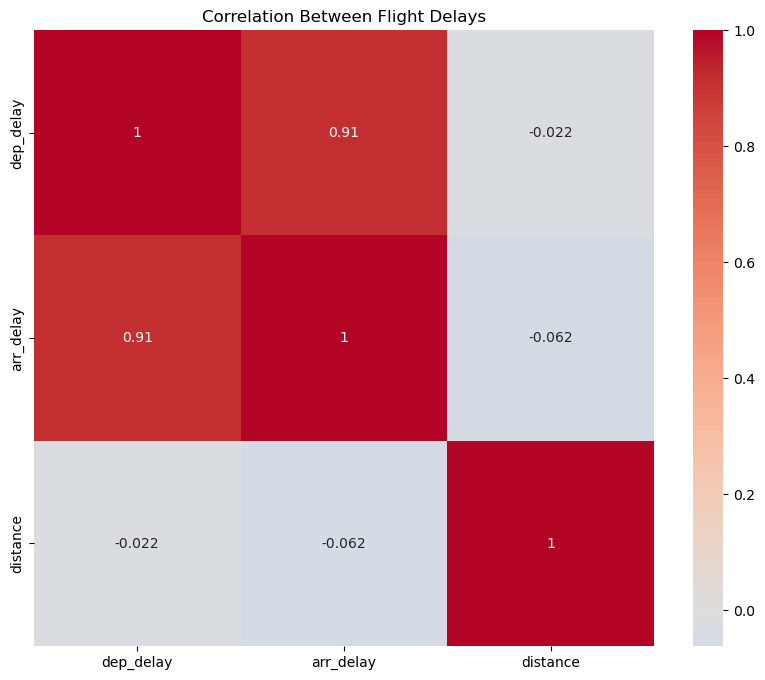

In [17]:
delay_columns = ['dep_delay', 'arr_delay', 'distance']
delay_data = flights_pd[delay_columns]

correlation_matrix = delay_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Flight Delays')
plt.show()

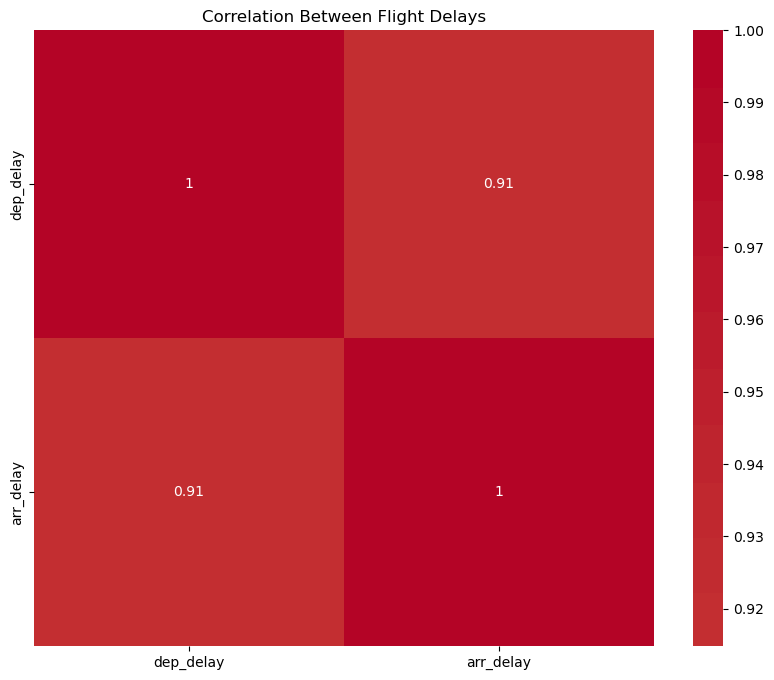

In [18]:
delay_columns = ['dep_delay', 'arr_delay']
delay_data = flights_pd[delay_columns]

correlation_matrix = delay_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Flight Delays')
plt.show()

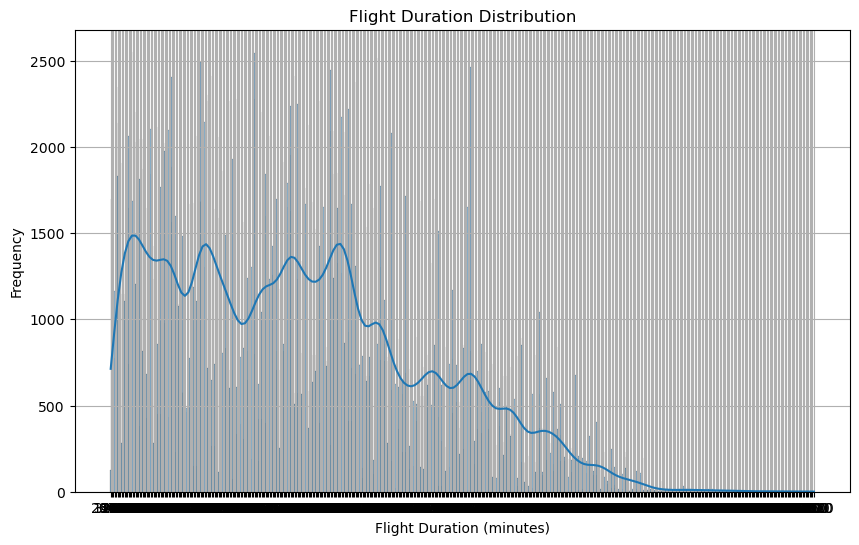

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(flights_pd['air_time'], bins=20, kde=True)
plt.title('Flight Duration Distribution')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

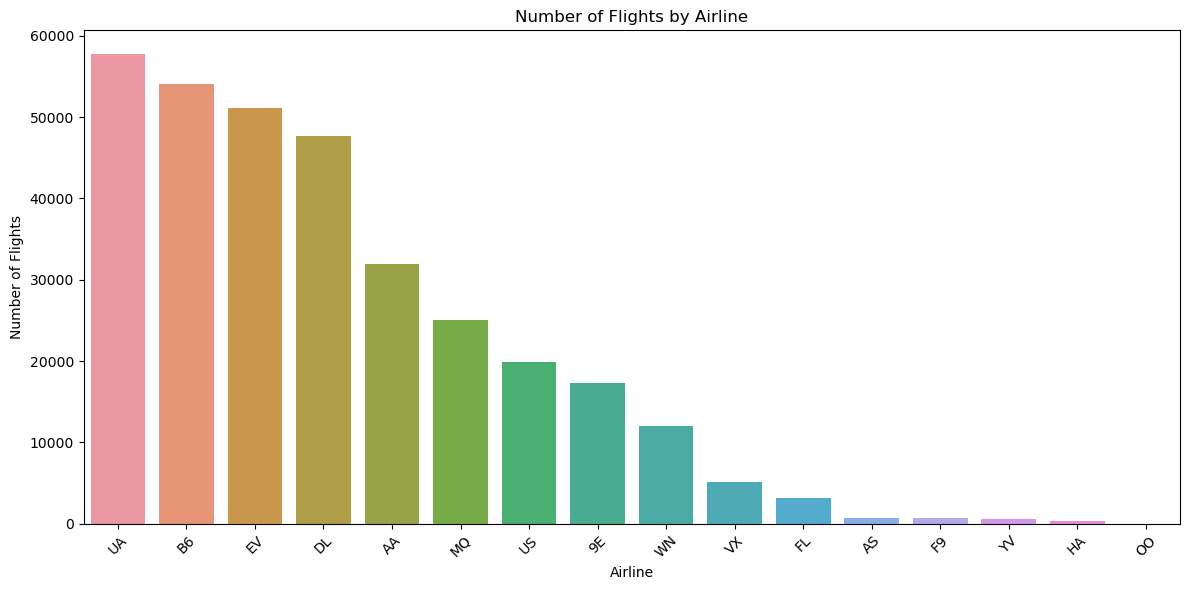

In [20]:
# Count the number of flights for each airline
airline_counts = flights_pd['carrier'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
flights_pd.dep_delay = pd.to_numeric(flights_pd.dep_delay, errors='coerce')
flights_pd.loc[(flights_pd.dep_delay > 15), 'DepDelay']='Yes'
flights_pd.loc[(flights_pd.dep_delay <= 15), 'DepDelay']='No'

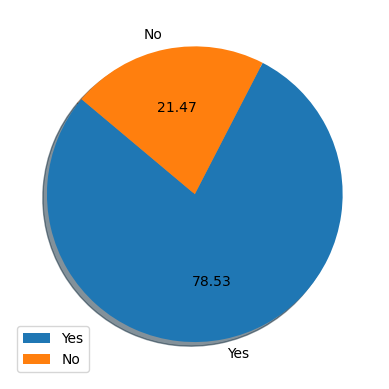

<Axes: xlabel='DepDelay'>

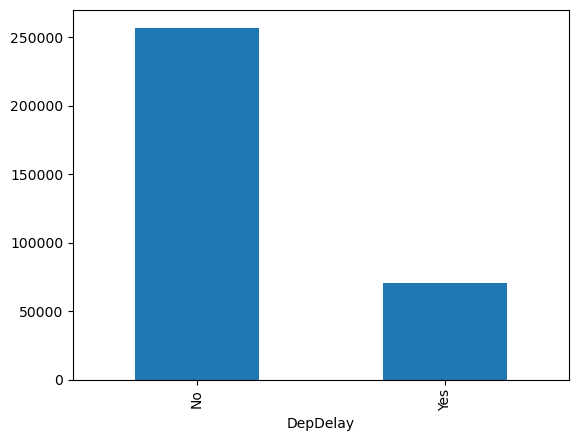

In [22]:
target = flights_pd['DepDelay'].value_counts()
plt.pie(target, labels=["Yes","No"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("DepDelay")
plt.legend(loc = "lower left")
plt.show()
flights_pd['DepDelay'].value_counts().plot.bar()

In [23]:
flights_pd.arr_delay = pd.to_numeric(flights_pd.arr_delay, errors='coerce')
flights_pd.loc[(flights_pd.arr_delay > 15), 'ArrDelay']='Yes'
flights_pd.loc[(flights_pd.arr_delay <= 15), 'ArrDelay']='No'

In [62]:
# Calculate average delay for each carrier
flights_pd['TotalDelay'] = flights_pd['arr_delay'] + flights_pd['dep_delay']
average_delay_per_carrier = flights_pd.groupby("carrier")["TotalDelay"].mean()

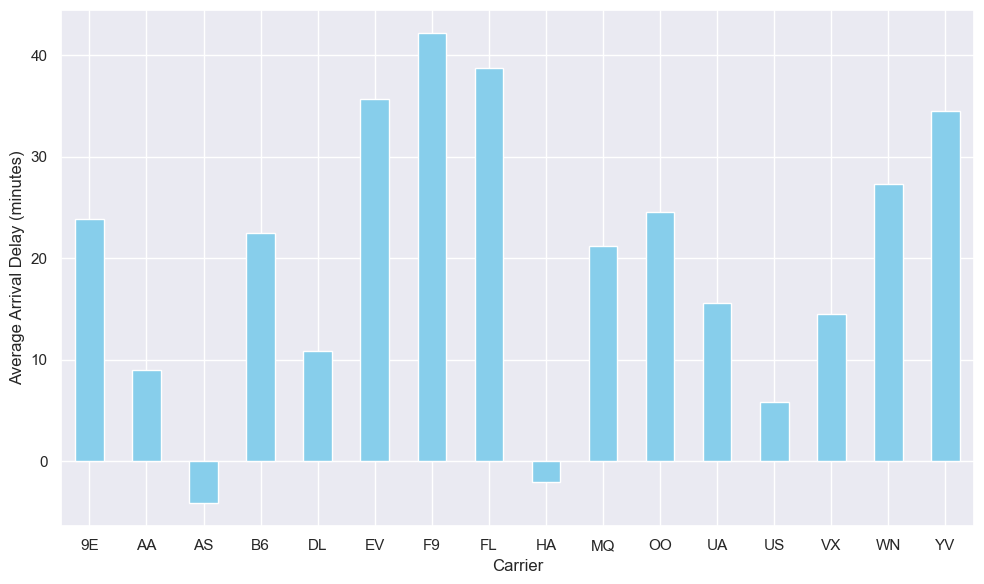

In [63]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_delay_per_carrier.plot(kind="bar", color="skyblue")
plt.title = ("Average Flight Delay by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


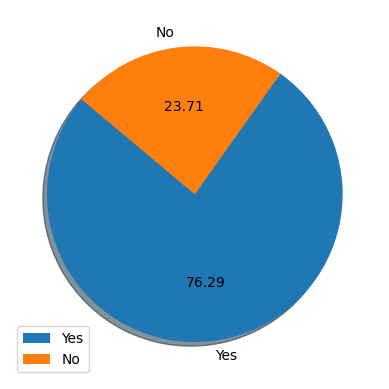

<Axes: xlabel='ArrDelay'>

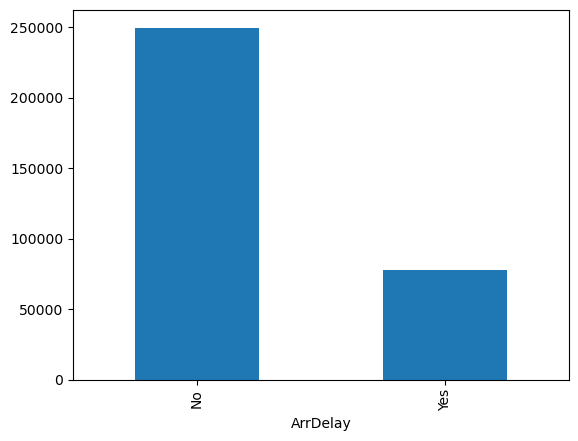

In [24]:
target = flights_pd['ArrDelay'].value_counts()
plt.pie(target, labels=["Yes","No"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("ArrDelay")
plt.legend(loc = "lower left")
plt.show()
flights_pd['ArrDelay'].value_counts().plot.bar()

<Axes: xlabel='dest', ylabel='Count'>

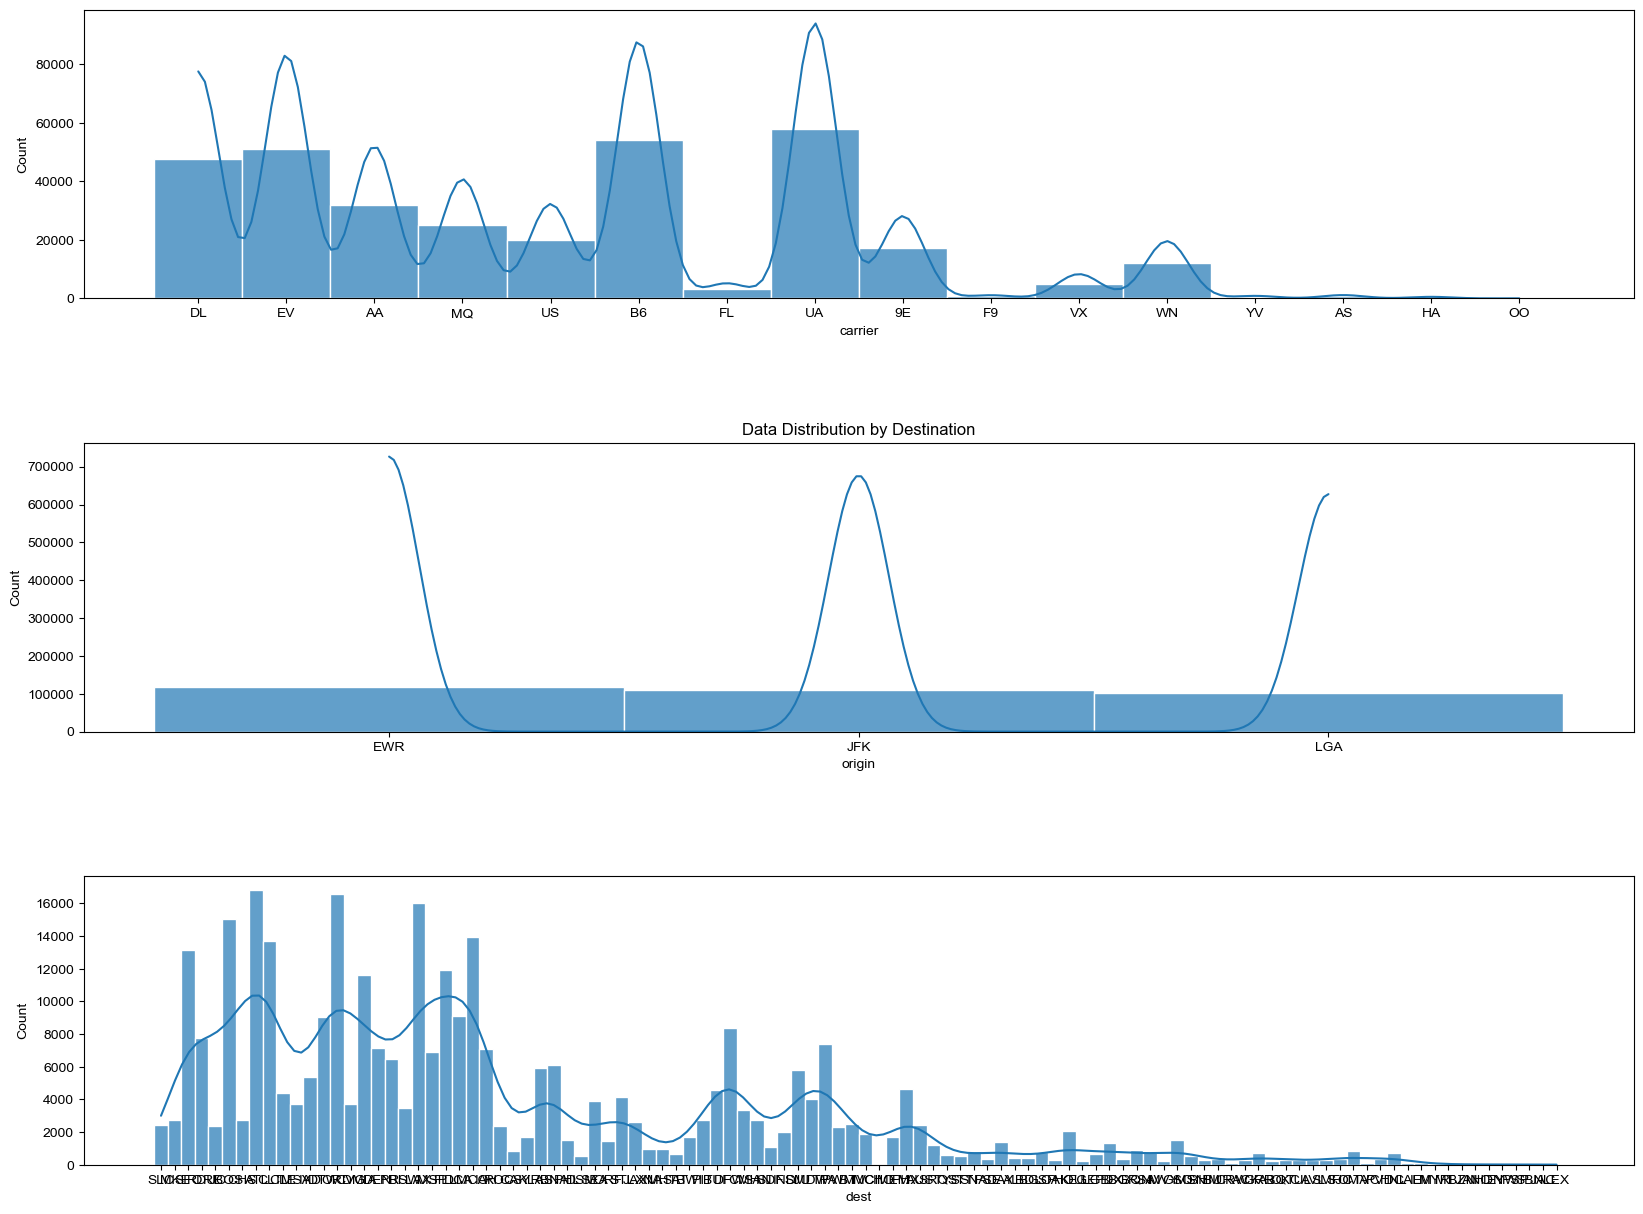

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
sns.set_theme()

axes[1].set_title('Data Distribution by Carriers')
sns.histplot(flights_pd['carrier'], bins=40, kde=True, alpha=0.7, ax=axes[0])

axes[1].set_title('Data Distribution by Origins')
sns.histplot(flights_pd['origin'], bins=40, kde=True, alpha=0.7, ax=axes[1])

axes[1].set_title('Data Distribution by Destination')
sns.histplot(flights_pd['dest'], bins=40, kde=True, alpha=0.7, ax=axes[2])

C:\Users\suraj\AppData\Local\Temp\ipykernel_5024\3455045790.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


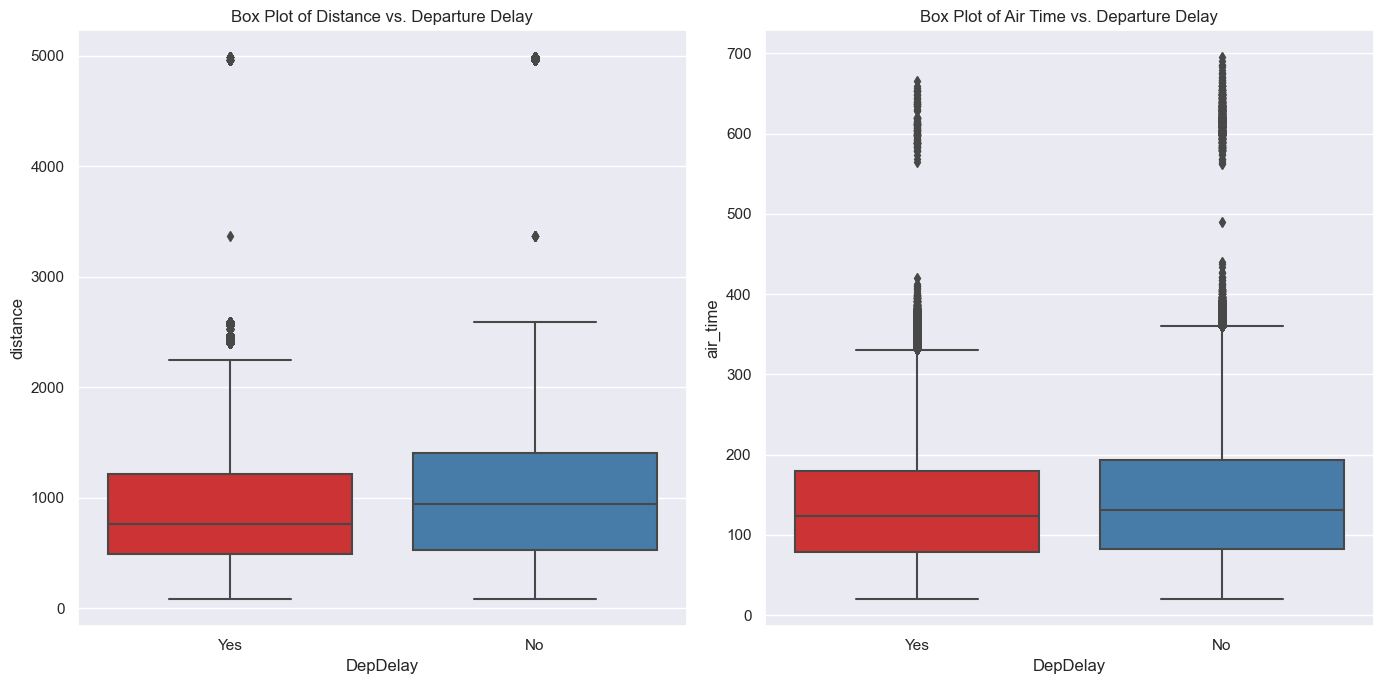

In [26]:
flights_pd.distance = pd.to_numeric(flights_pd.distance, errors='coerce')
flights_pd.air_time = pd.to_numeric(flights_pd.air_time, errors='coerce')

# A 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), constrained_layout=True)

# Subplot 1
sns.boxplot(x='DepDelay', y='distance', data=flights_pd, palette='Set1', ax=axes[0])
axes[0].set_title("Box Plot of Distance vs. Departure Delay", fontsize=12)

# Subplot 2
sns.boxplot(x='DepDelay', y='air_time', data=flights_pd, palette='Set1', ax=axes[1])
axes[1].set_title("Box Plot of Air Time vs. Departure Delay", fontsize=12)

# Adjust layout with vertical padding
plt.tight_layout()

# Show the plot
plt.show()

Average Flight delays of different Airlines

In [27]:
flights.createOrReplaceTempView("flights")
spark.sql(""" 
SELECT name, CAST(AVG(arr_delay + dep_delay) as DECIMAL(11,2)) AS AvgDelay
FROM flights
GROUP BY name
ORDER BY AvgDelay DESC
""").show()

+--------------------+--------+
|                name|AvgDelay|
+--------------------+--------+
|Frontier Airlines...|   42.12|
|AirTran Airways C...|   38.72|
|ExpressJet Airlin...|   35.64|
|  Mesa Airlines Inc.|   34.46|
|Southwest Airline...|   27.31|
|SkyWest Airlines ...|   24.52|
|   Endeavor Air Inc.|   23.82|
|     JetBlue Airways|   22.43|
|           Envoy Air|   21.22|
|United Air Lines ...|   15.57|
|      Virgin America|   14.52|
|Delta Air Lines Inc.|   10.87|
|American Airlines...|    8.93|
|     US Airways Inc.|    5.87|
|Hawaiian Airlines...|   -2.01|
|Alaska Airlines Inc.|   -4.10|
+--------------------+--------+



Total Flights per origin airport

In [28]:
spark.sql(""" 
SELECT origin, COUNT(*) AS TotalFlights
FROM flights
GROUP BY origin
ORDER BY TotalFlights DESC
""").show()

+------+------------+
|origin|TotalFlights|
+------+------------+
|   EWR|      117127|
|   JFK|      109079|
|   LGA|      101140|
+------+------------+



Total Flights per destination airport

In [29]:
spark.sql(""" 
SELECT dest, COUNT(*) AS TotalFlights
FROM flights
GROUP BY dest
ORDER BY TotalFlights DESC
""").show()

+----+------------+
|dest|TotalFlights|
+----+------------+
| ATL|       16837|
| ORD|       16566|
| LAX|       16026|
| BOS|       15022|
| MCO|       13967|
| CLT|       13674|
| SFO|       13173|
| FLL|       11897|
| MIA|       11593|
| DCA|        9111|
| DTW|        9031|
| DFW|        8388|
| RDU|        7770|
| TPA|        7390|
| DEN|        7169|
| IAH|        7085|
| MSP|        6929|
| PBI|        6487|
| BNA|        6084|
| LAS|        5952|
+----+------------+
only showing top 20 rows



Average Flight delays according to route

In [30]:
spark.sql(""" 
SELECT concat(origin, " - ", dest) AS route, CAST(AVG(arr_delay + dep_delay) as DECIMAL(11,2)) AS AvgDelay
FROM flights
GROUP BY route
ORDER BY AvgDelay DESC
""").show()

+---------+--------+
|    route|AvgDelay|
+---------+--------+
|EWR - TYS|   82.81|
|EWR - CAE|   78.95|
|EWR - TUL|   68.55|
|EWR - OKC|   59.80|
|EWR - JAC|   59.74|
|EWR - DSM|   53.04|
|EWR - RIC|   52.24|
|LGA - CAE|   49.17|
|EWR - ROC|   48.64|
|EWR - PWM|   48.50|
|EWR - MKE|   47.61|
|JFK - CVG|   46.44|
|LGA - BHM|   46.11|
|LGA - SBN|   45.83|
|JFK - CMH|   44.91|
|EWR - MSN|   44.41|
|LGA - MSN|   42.56|
|EWR - DCA|   42.28|
|JFK - EGE|   41.97|
|EWR - MCI|   41.93|
+---------+--------+
only showing top 20 rows



Average Flight delays according to route distance

In [31]:
spark.sql(""" 
SELECT CASE
        WHEN distance < 500 then 'Under 500'
        WHEN distance between 500 and 1000 then '500-1000'
        WHEN distance between 1000 and 1500 then '1000-1500'
        WHEN distance between 1500 and 2000 then '1500-2000'
        ELSE 'Above 2000'
    END AS DistanceRange, CAST(AVG(arr_delay + dep_delay) as DECIMAL(11,2)) AS AvgDelay
FROM flights
GROUP BY DistanceRange
ORDER BY AvgDelay DESC
""").show()

+-------------+--------+
|DistanceRange|AvgDelay|
+-------------+--------+
|     500-1000|   22.62|
|    Under 500|   22.56|
|    1500-2000|   17.51|
|    1000-1500|   17.29|
|   Above 2000|   12.08|
+-------------+--------+



In [32]:
spark.sql(""" 
SELECT CASE
        WHEN day = 1 then 'Sunday'
        WHEN day = 2 then 'Monday'
        WHEN day = 3 then 'Tuesday'
        WHEN day = 4 then 'Wednesday'
        WHEN day = 5 then 'Thursday'
        WHEN day = 6 then 'Friday'
        ELSE 'Saturday'
    END AS WeekDays, CAST(AVG(arr_delay + dep_delay) as DECIMAL(11,2)) AS AvgDelay
FROM flights
GROUP BY WeekDays
""").show()

+---------+--------+
| WeekDays|AvgDelay|
+---------+--------+
|Wednesday|    3.98|
|  Tuesday|   15.23|
|   Friday|    5.21|
| Thursday|    8.29|
| Saturday|   21.17|
|   Monday|   20.86|
|   Sunday|   21.50|
+---------+--------+



## Training Model <a class="anchor" id="training-model"></a>

Finally, casting the fields to appropriate data types. the prediction column 'arr_delay' is converted to integer value as 1 when delay > 15 and 0 otherwise.

In [33]:
from pyspark.sql.functions import *
flights = flights.select((col("year").cast("Int").alias("year")), \
                         (col("month").cast("Int").alias("month")), \
                         (col("day").cast("Int").alias("day")), "carrier", "origin", "dest", \
                         (col("dep_delay").cast("Int").alias("dep_delay")), \
                         (col("arr_delay").cast("Int").alias("arr_delay")))
flights = flights.select("year", "month", "day", "carrier", "origin", "dest", "arr_delay", \
                         ((col("dep_delay") > 15).cast("Int").alias("dep_delay_idx")))

In [34]:
# Importing Libraries
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, MinMaxScaler
from pyspark.ml import Pipeline

In [35]:
# Indexing Categorial features with string values
#Step 1
strIdx = StringIndexer(inputCol = "carrier", outputCol = "carrierIdx")

#Step 2
originIdx = StringIndexer(inputCol = "origin", outputCol = "originIdx")

#Step 3
destIdx = StringIndexer(inputCol = "dest", outputCol = "destIdx")

# Combining all feature variables into one single vector
#Step 4
categorial_features = VectorAssembler(inputCols = ["carrierIdx", "year", "month", "day", "originIdx", "destIdx"], outputCol="categorial_features")

# Indexing the vector
#Step 5
categorial_features_idx = VectorIndexer(inputCol = categorial_features.getOutputCol(), outputCol = "categorial_features_idx")

# Grouping the departure delay
#Step 6
delay_range = VectorAssembler(inputCols = ["arr_delay"], outputCol="delay_range")

#Step 7
range_features = MinMaxScaler(inputCol = delay_range.getOutputCol(), outputCol="range_features")

#Step 8
all_features = VectorAssembler(inputCols=["categorial_features_idx", "range_features"], outputCol="all_features")


### Logistic Regression

In [36]:
#Step 9
lr = LogisticRegression(labelCol="dep_delay_idx",featuresCol="all_features",maxIter=10,regParam=0.3)

# defining the pipeline that combines all above processes in a workflow
pipeline = Pipeline(stages=[strIdx, originIdx, destIdx, categorial_features, categorial_features_idx, 
                            delay_range, range_features, all_features, lr])

Splitting the dataset in 8:2 ratio for training and testing purposes

In [37]:
splits = flights.randomSplit([0.7, 0.3])

train = splits[0]
# rename the target variable in the test set to trueLabel
test = splits[1].withColumnRenamed("dep_delay_idx", "true_dep_delay_idx")

train_rows = train.count()
test_rows = test.count()

print ("Training rows count:", train_rows, " Testing rows count:", test_rows)

Training rows count: 229272  Testing rows count: 98074


## Testing Model <a class="anchor" id="testing-model"></a>

In [38]:
# Training the model
import timeit
start_time = timeit.default_timer()

lr_model = pipeline.fit(train)

elapsed = timeit.default_timer() - start_time

print ("Model training complete in:", elapsed, "secs")

Model training complete in: 22.857215499999995 secs


In [39]:
prediction = lr_model.transform(test)
predicted = prediction.select("all_features", "prediction", "true_dep_delay_idx")
predicted.show(10, truncate=False)

+-----------------------------------------------+----------+------------------+
|all_features                                   |prediction|true_dep_delay_idx|
+-----------------------------------------------+----------+------------------+
|[4.0,0.0,0.0,1.0,0.0,11.0,0.09499263622974963] |0.0       |1                 |
|[4.0,0.0,0.0,1.0,1.0,39.0,0.07142857142857142] |0.0       |0                 |
|[4.0,0.0,0.0,1.0,1.0,3.0,0.05596465390279823]  |0.0       |0                 |
|[4.0,0.0,0.0,1.0,1.0,7.0,0.054491899852724596] |0.0       |0                 |
|[4.0,0.0,0.0,1.0,2.0,11.0,0.0861561119293078]  |0.0       |0                 |
|[4.0,0.0,0.0,1.0,2.0,8.0,0.06480117820324005]  |0.0       |1                 |
|[1.0,0.0,0.0,1.0,0.0,4.0,0.061855670103092786] |0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,58.0,0.054491899852724596]|0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,35.0,0.06332842415316642] |0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,29.0,0.07069219440

Creation of Confusion Matrix

In [40]:
tp = float(predicted.filter("prediction == 1.0 AND true_dep_delay_idx == 1").count())
fp = float(predicted.filter("prediction == 1.0 AND true_dep_delay_idx == 0").count())
tn = float(predicted.filter("prediction == 0.0 AND true_dep_delay_idx == 0").count())
fn = float(predicted.filter("prediction == 0.0 AND true_dep_delay_idx == 1").count())
print("tp :", tp, "fp :", fp, "tn: ", tn, "fn : ", fn)

tp : 3175.0 fp : 17.0 tn:  76948.0 fn :  17934.0


In [41]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='prediction', rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(prediction)
print ("Area under the ROC curve = ", auc)

Area under the ROC curve =  0.9999973123191824


In [42]:
lr_metrics = spark.createDataFrame([
    ("Logistic Regression", "Precision", tp / (tp + fp)),
    ("Logistic Regression", "Recall", tp / (tp + fn)),
    ("Logistic Regression", "AUC", auc)
], ["Model", "Metric", "Value"])
lr_metrics.show()

+-------------------+---------+-------------------+
|              Model|   Metric|              Value|
+-------------------+---------+-------------------+
|Logistic Regression|Precision| 0.9946741854636592|
|Logistic Regression|   Recall|0.15040977781988726|
|Logistic Regression|      AUC| 0.9999973123191824|
+-------------------+---------+-------------------+



### Support Vector Machines

In [43]:
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(featuresCol="all_features", labelCol="dep_delay_idx", maxIter=50)
pipeline = Pipeline(stages=[strIdx, originIdx, destIdx, categorial_features, categorial_features_idx, 
                            delay_range, range_features, all_features, svm])

In [44]:
start_time = timeit.default_timer()

svm_model = pipeline.fit(train)

elapsed = timeit.default_timer() - start_time

print ("Model training complete in:", elapsed, "secs")

Model training complete in: 22.307613200000006 secs


In [45]:
prediction = svm_model.transform(test)
predicted = prediction.select("all_features", "prediction", "true_dep_delay_idx")
predicted.show(10, truncate=False)

+-----------------------------------------------+----------+------------------+
|all_features                                   |prediction|true_dep_delay_idx|
+-----------------------------------------------+----------+------------------+
|[4.0,0.0,0.0,1.0,0.0,11.0,0.09499263622974963] |1.0       |1                 |
|[4.0,0.0,0.0,1.0,1.0,39.0,0.07142857142857142] |0.0       |0                 |
|[4.0,0.0,0.0,1.0,1.0,3.0,0.05596465390279823]  |0.0       |0                 |
|[4.0,0.0,0.0,1.0,1.0,7.0,0.054491899852724596] |0.0       |0                 |
|[4.0,0.0,0.0,1.0,2.0,11.0,0.0861561119293078]  |0.0       |0                 |
|[4.0,0.0,0.0,1.0,2.0,8.0,0.06480117820324005]  |0.0       |1                 |
|[1.0,0.0,0.0,1.0,0.0,4.0,0.061855670103092786] |0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,58.0,0.054491899852724596]|0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,35.0,0.06332842415316642] |0.0       |0                 |
|[1.0,0.0,0.0,1.0,1.0,29.0,0.07069219440

In [46]:
tp = float(predicted.filter("prediction == 1.0 AND true_dep_delay_idx == 1").count())
fp = float(predicted.filter("prediction == 1.0 AND true_dep_delay_idx == 0").count())
tn = float(predicted.filter("prediction == 0.0 AND true_dep_delay_idx == 0").count())
fn = float(predicted.filter("prediction == 0.0 AND true_dep_delay_idx == 1").count())
print("tp :", tp, "fp :", fp, "tn: ", tn, "fn : ", fn)

tp : 13695.0 fp : 2271.0 tn:  74694.0 fn :  7414.0


In [47]:
evaluator = BinaryClassificationEvaluator(labelCol='prediction', rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(prediction)
print ("Area under the ROC curve = ", auc)

Area under the ROC curve =  0.999999859642306


In [48]:
svm_metrics = spark.createDataFrame([
    ("SVM", "Precision", tp / (tp + fp)),
    ("SVM", "Recall", tp / (tp + fn)),
    ("SVM", "AUC", auc)
], ["Model", "Metric", "Value"])
svm_metrics.show()

+-----+---------+-----------------+
|Model|   Metric|            Value|
+-----+---------+-----------------+
|  SVM|Precision|0.857760240511086|
|  SVM|   Recall|0.648775403856175|
|  SVM|      AUC|0.999999859642306|
+-----+---------+-----------------+



In [49]:
# Union the two PySpark DataFrames
combined_metrics = lr_metrics.union(svm_metrics)

# Pivot the DataFrame to have Metrics as columns
pivoted_metrics = combined_metrics.groupBy("Model").pivot("Metric").agg({"Value": "first"})

# Convert the PySpark DataFrame to a pandas DataFrame
results = pivoted_metrics.toPandas()

# Set 'Model' column as the index
results.set_index('Model', inplace=True)

In [50]:
results

,AUC,Precision,Recall
Model,,,
Logistic Regression,0.999997,0.994674,0.150410
SVM,1.000000,0.857760,0.648775


In [51]:
# spark.stop()